# Data Mining Final Exam Part 2

    Name: Aimi Nabilah Hassin
    Matric No: WQD180105/17198801

### Question 3

In this question, I am using the airbnb dataset from Question 1. The aim for this question is to predict the price for the listing house on airbnb. A predictive model based on Decision Tree algorithm shall be built in order to perform the price prediction.

#### Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np

#### Loading Data from Question 1

In [6]:
df = pd.read_csv('airbnb.csv')
df.sample(5)

,Unnamed: 0,listing_id,host_id,city,house_title,house_type,price,owner_name,no_of_reviews,rating,occupancy,no_of_guest,bedrooms_no,beds_no,bath_no
289,296,1289,100189,Manhattan,Landmark 2 Bedroom West Village NYC,Entire apartment,225.0,West Village,143,4.5,"['4 guests', '2 bedrooms', '2 beds', '1 bath',...",4.0,2.0,2.0,1.0
360,368,1360,100260,Orlando,"Luxury Disney Vacation- Disney,Universal,Seawo...",Entire condominium,19.0,LuxuryVacations,46,4.0,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...",4.0,1.0,2.0,1.0
273,280,1273,100173,Manhattan,"Big 1st Meal, Kind Host, Ace Space",Private room in apartment,134.0,Nancy,314,4.5,"['3 guests', '2 bedrooms', '3 beds', '1 shared...",3.0,2.0,3.0,1.0
244,251,1244,100144,Manhattan,"Beautiful spacious one bedroom, upper east side",Entire apartment,180.0,Julia,92,5.0,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...",3.0,1.0,2.0,1.0
204,211,1204,100104,Manhattan,New York City Historical Brownstone First Floor.,Entire apartment,27.0,Naima,231,5.0,"['6 guests', '2 bedrooms', '3 beds', '2 baths'...",6.0,2.0,3.0,2.0


In [7]:
print(df.describe())

       Unnamed: 0   listing_id        host_id       price  no_of_reviews  \
count  598.000000   598.000000     598.000000  598.000000     598.000000   
mean   305.295987  1298.500000  100198.500000  113.152174     111.458194   
std    176.639943   172.772008     172.772008   62.365046      77.052685   
min      0.000000  1000.000000   99900.000000   17.000000       3.000000   
25%    153.250000  1149.250000  100049.250000   65.000000      55.000000   
50%    306.500000  1298.500000  100198.500000   95.000000      95.000000   
75%    456.750000  1447.750000  100347.750000  150.000000     155.000000   
max    611.000000  1597.000000  100497.000000  500.000000     526.000000   

           rating  no_of_guest  bedrooms_no     beds_no     bath_no  
count  598.000000   598.000000   598.000000  598.000000  598.000000  
mean     4.678094     4.685619     1.358696    2.433110    1.220736  
std      0.330684     1.730065     0.737043    1.189587    0.598523  
min      3.500000     3.000000     

In [8]:
# Checking for any null value
(df.isnull()).any()

Unnamed: 0       False
listing_id       False
host_id          False
city             False
house_title      False
house_type       False
price            False
owner_name       False
no_of_reviews    False
rating           False
occupancy        False
no_of_guest      False
bedrooms_no      False
beds_no          False
bath_no          False
dtype: bool

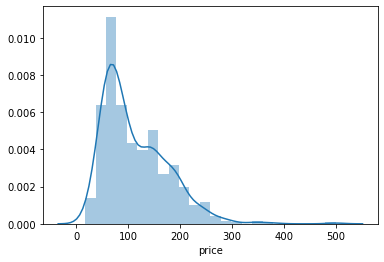

In [11]:
# Plotting the graph for the price's distribution
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

pd.plotting.register_matplotlib_converters() 
sns.distplot(a=df['price'])

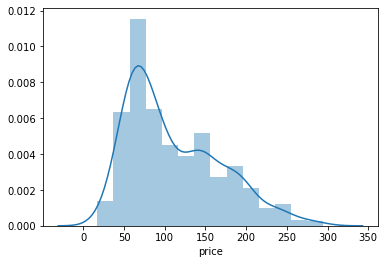

In [12]:
df_set = df.loc[df.price < 300] 
sns.distplot(a=df_set['price'])

**Comment:** From the illustrated distribution graph above, we can observe that the price distribution for airbnb in Manhanttan and Orlando is ranging between USD25-USD300 per night, and  highest distribution falls under USD70.

#### Feature Selection

Only important features are selected from the dataset for further processing.

In [13]:
df_features = ['no_of_reviews', 'rating', 'no_of_guest', 'bedrooms_no']
X = df[df_features] # Features
y = df.price # Target variable

X.sample(5)

,no_of_reviews,rating,no_of_guest,bedrooms_no
585,30,4.5,4.0,1.0
444,139,4.5,4.0,3.0
159,116,5.0,6.0,1.0
265,31,4.5,8.0,2.0
331,178,5.0,4.0,1.0


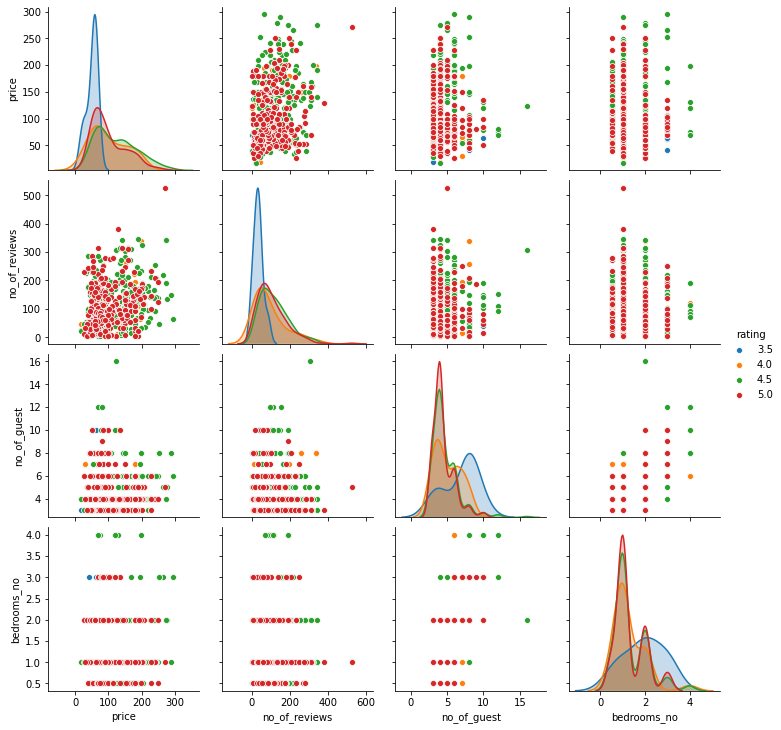

In [14]:
# Finding the correlation between the features and target variable
relevant_parameters = ['price'] + df_features
sns.pairplot(df.loc[df.price < 300][relevant_parameters], hue="rating")

**Comment:** Based on the features and target variable relationship above, we can notice that the number of reviews on airbnb listing is more popular for the house with few bedrooms. It is understandable that most of the guests rent smaller/fewer rooms. Besides, most of the reviews are also made for the cheaper priced rooms where the reviews can been seen very densed for price below than USD150. It is also noted that most of the reviews have high rating, with 5.0 rating dominates the reviews.

#### Splitting Data

In [15]:
# Split dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testing

print("Training set: Xtrain:{} ytrain:{}".format(X_train.shape, y_train.shape)) 
print("Test set: Xtest:{} ytest:{}".format(X_test.shape, y_test.shape)) 
print("---") 
print("Full dataset: X:{} y:{}".format(X.shape, y.shape))

Training set: Xtrain:(418, 4) ytrain:(418,)
Test set: Xtest:(180, 4) ytest:(180,)
---
Full dataset: X:(598, 4) y:(598,)


#### Building Decision Tree Model
Since the target variable data is in continuous form, thus I am using DecisionTreeRegressor for my model.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
airbnb_model = DecisionTreeRegressor(random_state = 42) 
airbnb_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

DecisionTreeRegressor(presort=False, random_state=42)

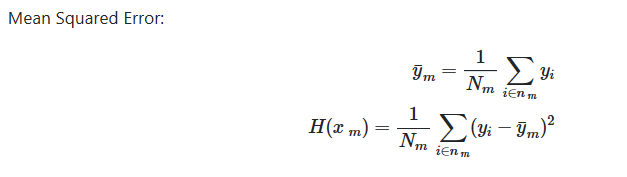

**Comment:** Mean Square Error (MSE) is used as the criterion to minimise as for determining locations for future splits.

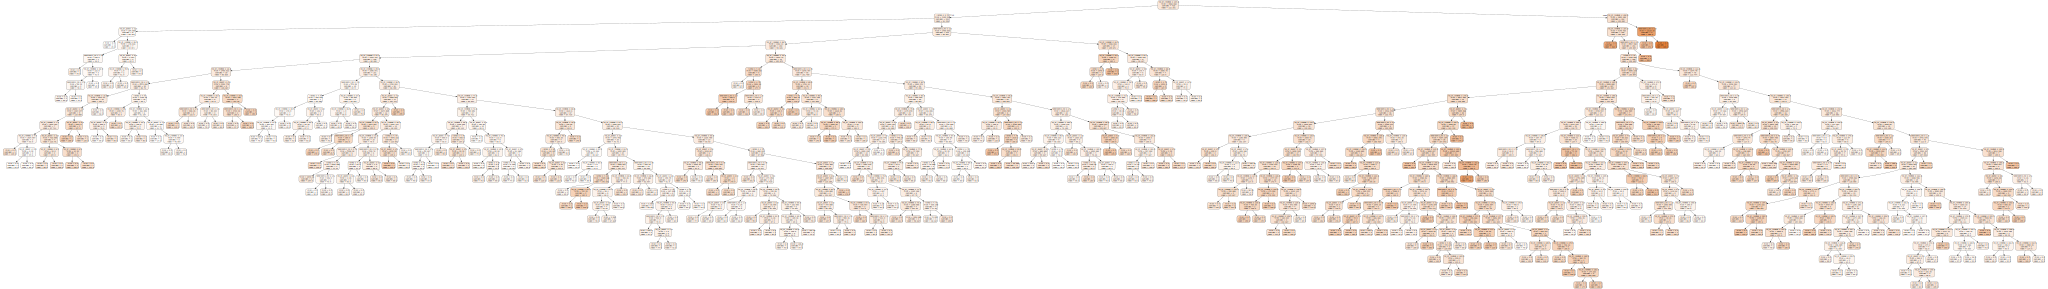

In [18]:
# Visualizing decision tree for training set
import graphviz 
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(airbnb_model, out_file=None, 
                      feature_names=df_features,  
                      class_names=df.price,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [19]:
# Saving the graph in pdf format
graph.render("airbnb_tree1") 

'airbnb_tree1.pdf'

In [20]:
# The snippets of the prediction model for sample from training set
X_train.head()

,no_of_reviews,rating,no_of_guest,bedrooms_no
108,162,4.0,4.0,1.0
272,78,4.5,6.0,1.0
597,114,5.0,4.0,2.0
478,56,4.5,4.0,1.0
596,62,4.5,5.0,2.0


In [21]:
# The obtained prices from the predictions
airbnb_model.predict(X_train.head())

array([145.        , 140.        ,  85.        ,  59.66666667,
        99.        ])

#### Model Evaluation

In [22]:
# Evaluating the model by using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

# Instructing the model to make predictions for the prices on the test set 
test_predictions = airbnb_model.predict(X_test)

# Calculating the MAE between the actual prices (in y_test) and the predictions made 
test_prediction_errors = mean_absolute_error(y_test, test_predictions)

test_prediction_errors

54.86296296296295

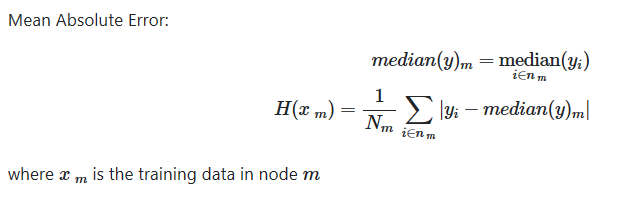

**Comment:** **Mean Absolute Error (MAE)** is used to evaluate our model. Generally, MAE works in minimizing the L1 error using median values at terminal nodes. From the result above, we can say that our model gives an absolute error of approximately USD 54.86 per accomodation when we experiment on the testing data, out of a USD 113.15 mean value  at the initial data exploration. The high MAE might be resulted due to the small dataset or the model is too naive.

In [23]:
# This function takes both the training and testing sets to compute the MAE for a Decision Tree 

def compute_mae(X_train, y_train, X_test, y_test, max_leaf_nodes): 
  trees_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 42) 
  trees_model.fit(X_train, y_train) 
  validation_predictions = trees_model.predict(X_test) 
  error = mean_absolute_error(y_test, test_predictions)
  
  return(error)

def get_best_tree_size(X_train, y_train, X_test, y_test, verbose = False):
  # candidates to iterate on finding a better tree depth  
  candidate_max_leaf_nodes = [5, 10, 20, 30, 50, 100, 250, 500]
  
  # initialization 
  minimum_error = None 
  best_tree_size = 5 
  
  # loop to find the minimal error value 
  for max_leaf_nodes in candidate_max_leaf_nodes: 
    current_error = compute_mae(X_train, y_train, X_test, y_test, max_leaf_nodes) 
    verbose and print("(Size: {}, MAE: {})".format(max_leaf_nodes, current_error)) 
    
    if(minimum_error == None or current_error < minimum_error): 
      minimum_error = current_error 
      best_tree_size = max_leaf_nodes 
     
    return(best_tree_size) 
  
best_tree_size = get_best_tree_size(X_train, y_train, X_test, y_test, True) 
best_tree_size

(Size: 5, MAE: 54.86296296296295)


5

In [24]:
# Create the Decision Tree model
airbnb_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 42)
airbnb_model.fit(X_train, y_train)

# Generate the predictions for the testing set
test_predictions = airbnb_model.predict(X_test)
test_prediction_errors = mean_absolute_error(y_test, test_predictions)

test_prediction_errors

44.9254156223893

**Comment:** After tuning up the maximum number of nodes hyper-parameter, we able to increase our prediction model on average of **~ USD 9.94** (54.863 - 44.925) by reducing the model's errors.

In [27]:
# Since in previous steps we exclude categorical data, we are going to apply Label Encoding for the categorical data as this particular data may (or may not) improve the model

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_features_extended = ['city', 'no_of_reviews', 'rating', 'no_of_guest', 'bedrooms_no']
X = df[df_features_extended]

X.sample(5)

,city,no_of_reviews,rating,no_of_guest,bedrooms_no
161,Manhattan,109,4.5,3.0,1.0
422,Orlando,76,4.5,4.0,1.0
254,Manhattan,195,5.0,4.0,2.0
462,Orlando,118,4.5,4.0,1.0
530,Orlando,81,4.5,4.0,1.0


In [28]:
categorical = (X.dtypes == 'object')
categorial_columns = list(categorical[categorical].index)

categorial_columns

['city']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create copies of our data sets to apply the transformations
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

encoder = LabelEncoder()

# for each column we fit the encoder and transform each of the rows
for column in categorial_columns:
    X_train_encoded[column] = encoder.fit_transform(X_train[column])
    X_test_encoded[column] = encoder.transform(X_test[column])

# A sample of our transformed data
X_train_encoded.sample(5)

,city,no_of_reviews,rating,no_of_guest,bedrooms_no
8,0,125,4.5,4.0,1.0
532,1,62,4.5,6.0,2.0
254,0,195,5.0,4.0,2.0
517,1,66,4.5,6.0,2.0
282,0,148,4.0,4.0,0.5


In [30]:
# Compute the best tree size
best_tree_size = get_best_tree_size(X_train_encoded, y_train, X_test_encoded, y_test)

# Create the model
airbnb_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 42)
airbnb_model.fit(X_train_encoded, y_train)

# Generate the predictions for the validation set
test_predictions = airbnb_model.predict(X_test_encoded)
test_prediction_errors = mean_absolute_error(y_test, test_predictions)

test_prediction_errors

29.267797935495306

**Comment:** By applying label encoding to categorical data, we can boost our predictive model by reducing MAE to approximately **~ USD 29.27**. This result also proves that Label Encoding is the best fit for our categorical data and by inluding the categorical data, we can improve our model significantly as compared to the intial model (without categorical data).

#### Visualizing Decision Tree

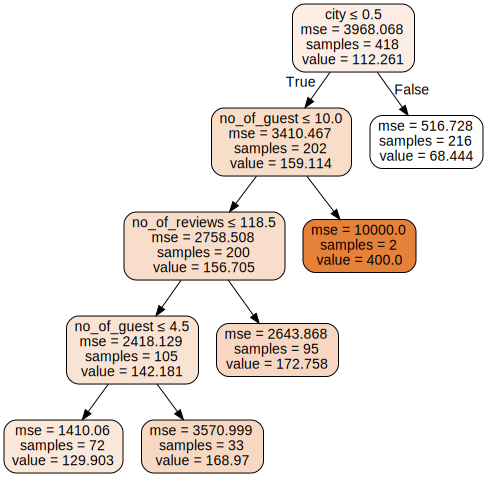

In [31]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(airbnb_model, out_file=None, 
                      feature_names=df_features_extended,  
                      class_names=df.price,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [32]:
# Saving the graph in pdf format
graph.render("airbnb_tree2") 

'airbnb_tree2.pdf'